In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, subplots, figure, savefig
import numpy as np
%matplotlib inline

#--------------------------------------------------
# Benchmark Helperfunctions
#--------------------------------------------------
def extract_benchmark_metrics(csv_path, data_size, data_unit):
    dataSizeInMb = data_size
    results = pd.read_csv(csv_path)
    runtime = [runtime for runtime in results['Runtime']]
    if "g" in data_unit:
        dataSizeInMb = data_size*1024
    executionTimeInSec = [time/1000 for time in runtime]
    throughput = [round(dataSizeInMb/executionTime, 2) for executionTime in executionTimeInSec]
    return runtime, throughput


def autolabel(rects, plot):
    for rect in rects:
        h = rect.get_height()
        plot.text(rect.get_x()+rect.get_width()/2.,
                                   0.999*h, 
                                   '%d'%int(h),
                                   ha='center', 
                                   va='bottom')
        
def add_plot_data(plot_name, flink_agg_results, flink_groupby_results, flink_sorting_results,  spark_agg_results, spark_groupby_results, spark_sorting_results, benchmark_type, data_size):
    flink_data = [np.mean(flink_agg_results), # agg
                      np.mean(flink_groupby_results), # groupby
                      np.mean(flink_sorting_results)] # sorting

    # TODO - Spark 1 GB Runtime
    spark_data = [np.mean(spark_agg_results),
                         np.mean(spark_groupby_results),
                         np.mean(spark_sorting_results)]

    flink_data_rect = plot_name.bar(ind, flink_data, width, color='darkred')
    spark_data_rect = plot_name.bar(ind+width, spark_data, width, color='darkorange')


    plot_name.set_title(data_size + ' Flink and Spark '+ benchmark_type)
    if benchmark_type == 'Runtime':
        plot_name.set_ylabel('Time in ms')
    else:
        plot_name.set_ylabel('mb / sec')
        plot_name.legend( (flink_data_rect[0],
                           spark_data_rect[0]),
                         ('flink', 'spark'),
                        bbox_to_anchor=(1, 1))
    plot_name.set_xticks(ind+width)
    plot_name.set_xticklabels( ('Aggregation', 'GroupBy', 'Sort') )

    autolabel(flink_data_rect, plot_name)
    autolabel(spark_data_rect, plot_name)


In [100]:
#--------------------------------------------------
# Fetch Flink data from csv files
#--------------------------------------------------

## Flink 1GB
flink_aggregation_1gb_runtime, flink_aggregation_1gb_throughput = extract_benchmark_metrics("flink/1gb/flink_aggregate.csv", 1, "gb")
flink_groupby_1gb_runtime, flink_groupby_1gb_throughput = extract_benchmark_metrics("flink/1gb/flink_groupby.csv", 1, "gb")
flink_sorting_1gb_runtime, flink_sorting_1gb_throughput = extract_benchmark_metrics("flink/1gb/flink_sorting.csv", 1, "gb")


## Flink Aggregation 5GB
flink_aggregation_5gb_runtime, flink_aggregation_5gb_throughput = extract_benchmark_metrics("flink/5gb/flink_aggregate.csv", 5, "gb")
flink_groupby_5gb_runtime, flink_groupby_5gb_throughput = extract_benchmark_metrics("flink/5gb/flink_groupby.csv", 5, "gb")
flink_sorting_5gb_runtime, flink_sorting_5gb_throughput = extract_benchmark_metrics("flink/5gb/flink_sorting.csv", 5, "gb")

## Flink Aggregation 10GB
flink_aggregation_10gb_runtime, flink_aggregation_10gb_throughput = extract_benchmark_metrics("flink/10gb/flink_aggregate.csv", 10, "gb")
flink_groupby_10gb_runtime, flink_groupby_10gb_throughput = extract_benchmark_metrics("flink/10gb/flink_groupby.csv", 10, "gb")
flink_sorting_10gb_runtime, flink_sorting_10gb_throughput = extract_benchmark_metrics("flink/10gb/flink_sorting.csv", 10, "gb")

In [102]:
#--------------------------------------------------
# Fetch Spark data from csv files
#--------------------------------------------------

## Spark 1GB
spark_aggregation_1gb_results_runtime, spark_aggregation_1gb_results_throughput = extract_benchmark_metrics("spark_new/spark_aggregate_1gb.csv", 1, "gb")
spark_groupby_1gb_results_runtime, spark_groupby_1gb_results_throughput = extract_benchmark_metrics("spark_new/spark_groupby_1gb.csv", 1, "gb")
spark_sorting_1gb_results_runtime, spark_sorting_1gb_results_throughput = extract_benchmark_metrics("spark_new/spark_sorting_1gb.csv", 1, "gb")


## Spark 5GB
spark_aggregation_5gb_results_runtime, spark_aggregation_5gb_results_throughput = extract_benchmark_metrics("spark_new/spark_aggregate_5gb.csv", 5, "gb")
spark_groupby_5gb_results_runtime, spark_groupby_5gb_results_throughput = extract_benchmark_metrics("spark_new/spark_groupby_5gb.csv", 5, "gb")
spark_sorting_5gb_results_runtime, spark_sorting_5gb_results_throughput = extract_benchmark_metrics("spark_new/spark_sorting_5gb.csv", 5, "gb")

## Spark 10GB
spark_aggregation_10gb_results_runtime, spark_aggregation_10gb_results_throughput = extract_benchmark_metrics("spark_new/spark_aggregate_10gb.csv", 10, "gb")
spark_groupby_10gb_results_runtime, spark_groupby_10gb_results_throughput = extract_benchmark_metrics("spark_new/spark_groupby_10gb.csv", 10, "gb")
spark_sorting_10gb_results_runtime, spark_sorting_10gb_results_throughput = extract_benchmark_metrics("spark_new/spark_sorting_10gb.csv", 10, "gb")


    

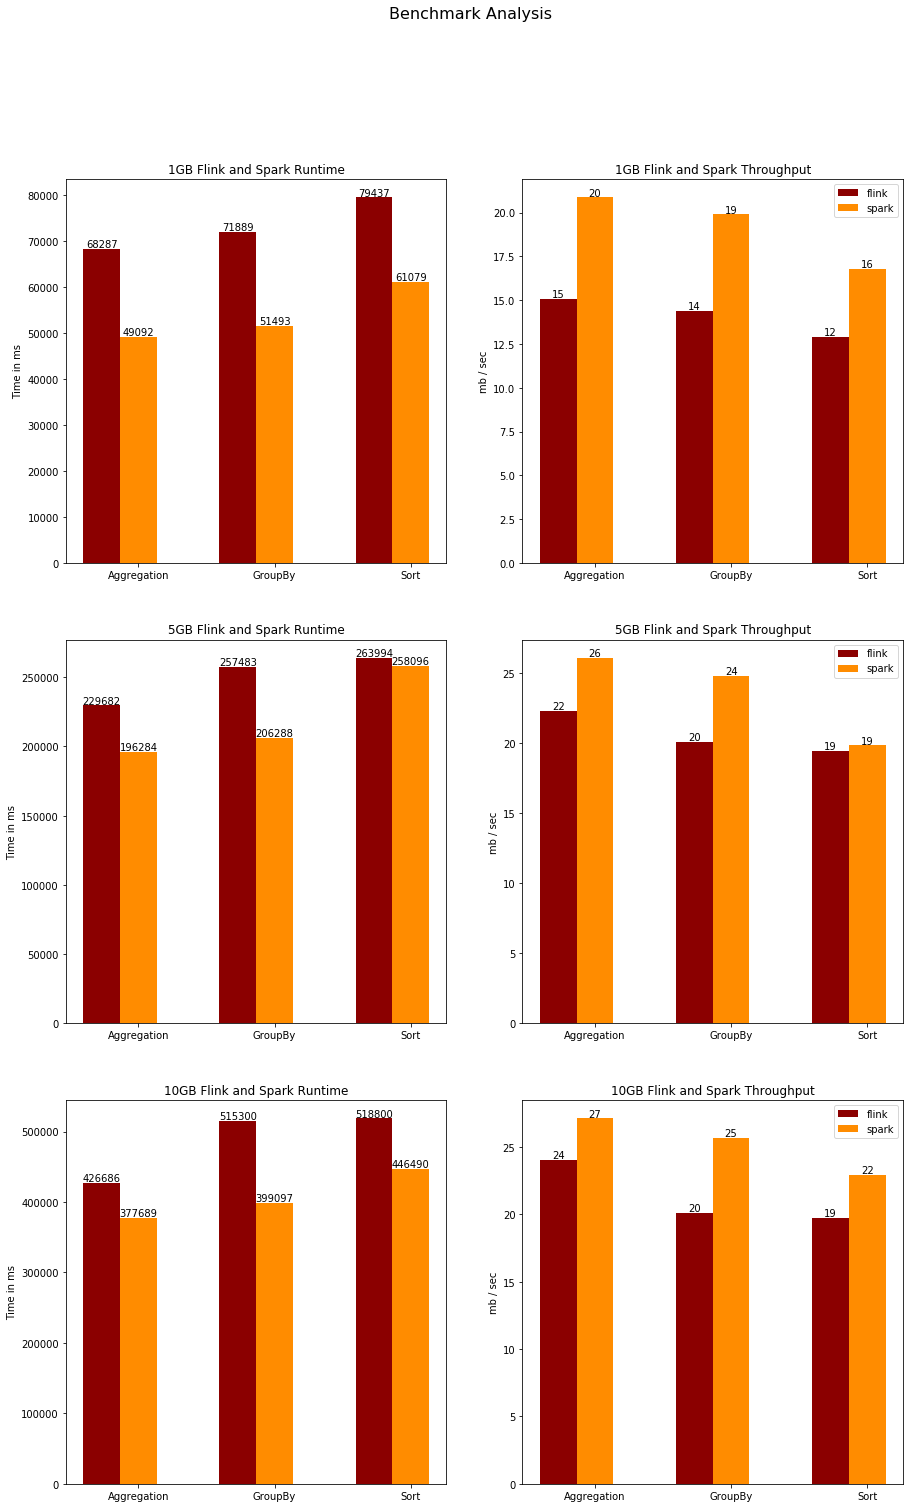

In [103]:
import random

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
x = [x for x in range(10)] # number of iterations

fig = plt.figure(figsize=(15,24))
fig.suptitle('Benchmark Analysis', fontsize=16)

_1gb_runtime_data_plot = fig.add_subplot(3,2,1)
_1gb_throughput_data_plot = fig.add_subplot(3,2,2)
_5gb_runtime_data_plot = fig.add_subplot(3,2,3)
_5gb_throughput_data_plot = fig.add_subplot(3,2,4)
_10gb_runtime_data_plot = fig.add_subplot(3,2,5)
_10gb_throughput_data_plot = fig.add_subplot(3,2,6)


#--------------------------------------------------
# 1GB Benchmark
#--------------------------------------------------
# Flink vs Spark Runtime
add_plot_data(_1gb_runtime_data_plot,
              flink_aggregation_1gb_runtime,
              flink_groupby_1gb_runtime,
              flink_sorting_1gb_runtime,
              spark_aggregation_1gb_results_runtime,
              spark_groupby_1gb_results_runtime,
              spark_sorting_1gb_results_runtime,
              "Runtime",
              "1GB")

# Flink vs Spark Througput
add_plot_data(_1gb_throughput_data_plot,
              flink_aggregation_1gb_throughput,
              flink_groupby_1gb_throughput,
              flink_sorting_1gb_throughput,
              spark_aggregation_1gb_results_throughput,
              spark_groupby_1gb_results_throughput,
              spark_sorting_1gb_results_throughput,
              "Throughput",
              "1GB")

#--------------------------------------------------
# 5GB Benchmark
#--------------------------------------------------
# Flink vs Spark Runtime
add_plot_data(_5gb_runtime_data_plot,
              flink_aggregation_5gb_runtime,
              flink_groupby_5gb_runtime,
              flink_sorting_5gb_runtime,
              spark_aggregation_5gb_results_runtime,
              spark_groupby_5gb_results_runtime,
              spark_sorting_5gb_results_runtime,
              "Runtime",
              "5GB")

# Flink vs Spark Througput
add_plot_data(_5gb_throughput_data_plot,
              flink_aggregation_5gb_throughput,
              flink_groupby_5gb_throughput,
              flink_sorting_5gb_throughput,
              spark_aggregation_5gb_results_throughput,
              spark_groupby_5gb_results_throughput,
              spark_sorting_5gb_results_throughput,
              "Throughput",
              "5GB")

#--------------------------------------------------
# 10GB Benchmark
#--------------------------------------------------
# Flink vs Spark Runtime
add_plot_data(_10gb_runtime_data_plot,
              flink_aggregation_10gb_runtime,
              flink_groupby_10gb_runtime,
              flink_sorting_10gb_runtime,
              spark_aggregation_10gb_results_runtime,
              spark_groupby_10gb_results_runtime,
              spark_sorting_10gb_results_runtime,
              "Runtime",
              "10GB")

# Flink vs Spark Througput
add_plot_data(_10gb_throughput_data_plot,
              flink_aggregation_10gb_throughput,
              flink_groupby_10gb_throughput,
              flink_sorting_10gb_throughput,
              spark_aggregation_10gb_results_throughput,
              spark_groupby_10gb_results_throughput,
              spark_sorting_10gb_results_throughput,
              "Throughput",
              "10GB")


savefig('flink-spark-benchmark-analysis.pdf')





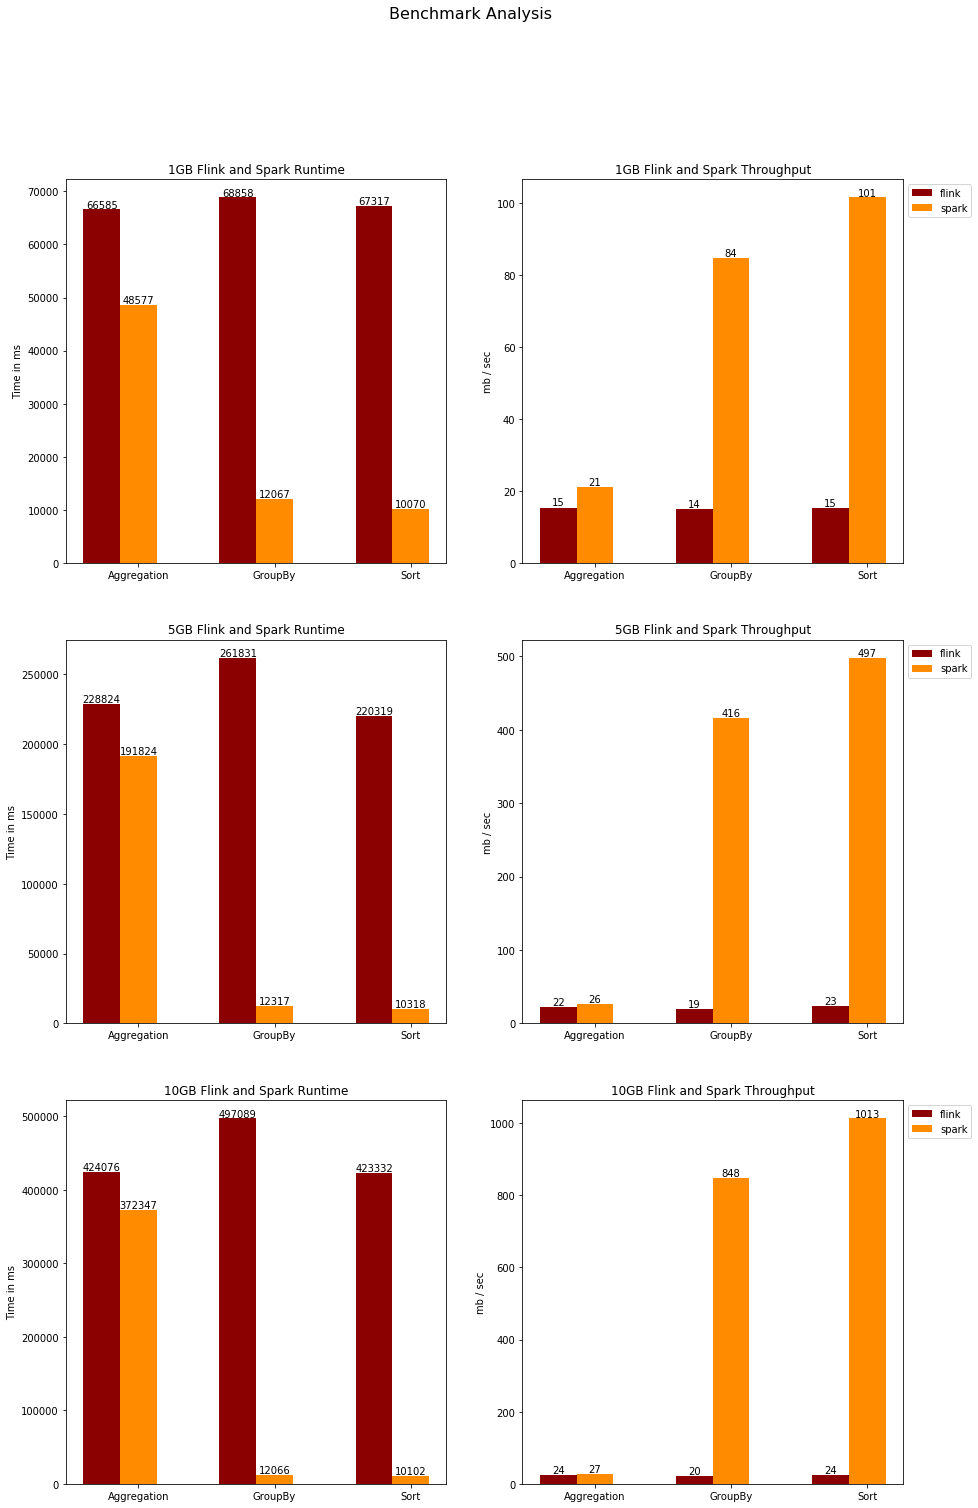

In [94]:
import random

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
x = [x for x in range(10)] # number of iterations

fig = plt.figure(figsize=(15,24))
fig.suptitle('Benchmark Analysis', fontsize=16)

_1gb_runtime_data_plot = fig.add_subplot(3,2,1)
_1gb_throughput_data_plot = fig.add_subplot(3,2,2)
_5gb_runtime_data_plot = fig.add_subplot(3,2,3)
_5gb_throughput_data_plot = fig.add_subplot(3,2,4)
_10gb_runtime_data_plot = fig.add_subplot(3,2,5)
_10gb_throughput_data_plot = fig.add_subplot(3,2,6)


#--------------------------------------------------
# 1GB Benchmark
#--------------------------------------------------
# Flink vs Spark Runtime
add_plot_data(_1gb_runtime_data_plot,
              flink_aggregation_1gb_runtime,
              flink_groupby_1gb_runtime,
              flink_sorting_1gb_runtime,
              spark_aggregation_1gb_results_runtime,
              spark_groupby_1gb_results_runtime,
              spark_sorting_1gb_results_runtime,
              "Runtime",
              "1GB")

# Flink vs Spark Througput
add_plot_data(_1gb_throughput_data_plot,
              flink_aggregation_1gb_throughput,
              flink_groupby_1gb_throughput,
              flink_sorting_1gb_throughput,
              spark_aggregation_1gb_results_throughput,
              spark_groupby_1gb_results_throughput,
              spark_sorting_1gb_results_throughput,
              "Throughput",
              "1GB")

#--------------------------------------------------
# 5GB Benchmark
#--------------------------------------------------
# Flink vs Spark Runtime
add_plot_data(_5gb_runtime_data_plot,
              flink_aggregation_5gb_runtime,
              flink_groupby_5gb_runtime,
              flink_sorting_5gb_runtime,
              spark_aggregation_5gb_results_runtime,
              spark_groupby_5gb_results_runtime,
              spark_sorting_5gb_results_runtime,
              "Runtime",
              "5GB")

# Flink vs Spark Througput
add_plot_data(_5gb_throughput_data_plot,
              flink_aggregation_5gb_throughput,
              flink_groupby_5gb_throughput,
              flink_sorting_5gb_throughput,
              spark_aggregation_5gb_results_throughput,
              spark_groupby_5gb_results_throughput,
              spark_sorting_5gb_results_throughput,
              "Throughput",
              "5GB")

#--------------------------------------------------
# 10GB Benchmark
#--------------------------------------------------
# Flink vs Spark Runtime
add_plot_data(_10gb_runtime_data_plot,
              flink_aggregation_10gb_runtime,
              flink_groupby_10gb_runtime,
              flink_sorting_10gb_runtime,
              spark_aggregation_10gb_results_runtime,
              spark_groupby_10gb_results_runtime,
              spark_sorting_10gb_results_runtime,
              "Runtime",
              "10GB")

# Flink vs Spark Througput
add_plot_data(_10gb_throughput_data_plot,
              flink_aggregation_10gb_throughput,
              flink_groupby_10gb_throughput,
              flink_sorting_10gb_throughput,
              spark_aggregation_10gb_results_throughput,
              spark_groupby_10gb_results_throughput,
              spark_sorting_10gb_results_throughput,
              "Throughput",
              "10GB")


savefig('flink-spark-benchmark-analysis.pdf')




In [ ]:
# BACKUP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, subplots, figure, savefig
import numpy as np
%matplotlib inline

#--------------------------------------------------
# Benchmark Helperfunctions
#--------------------------------------------------
def extract_benchmark_metrics(csv_path, data_size, data_unit):
    dataSizeInMb = data_size
    results = pd.read_csv(csv_path, skiprows=range(1, 3))
    runtime = [runtime for runtime in results['Runtime']]
    if "g" in data_unit:
        dataSizeInMb = data_size*1024
    executionTimeInSec = [time/1000 for time in runtime]
    throughput = [round(dataSizeInMb/executionTime, 2) for executionTime in executionTimeInSec]
    return runtime, throughput


def autolabel(rects, plot):
    for rect in rects:
        h = rect.get_height()
        plot.text(rect.get_x()+rect.get_width()/2.,
                                   0.999*h, 
                                   '%d'%int(h),
                                   ha='center', 
                                   va='bottom')
        
def add_plot_data(plot_name, flink_agg_results, flink_groupby_results, flink_sorting_results,  spark_agg_results, spark_groupby_results, spark_sorting_results, benchmark_type, data_size):
    flink_data = [np.mean(flink_agg_results)] # sorting

    # TODO - Spark 1 GB Runtime
    spark_data = [np.mean(spark_agg_results)]
    ind = np.arange(1, 2)

    flink_data_rect = plot_name.bar(ind, flink_data, width, color='darkred')
    spark_data_rect = plot_name.bar(ind+width, spark_data, width, color='darkorange')


    plot_name.set_title(data_size + ' Flink and Spark '+ benchmark_type)
    if benchmark_type == 'Runtime':
        plot_name.set_ylabel('Time in ms')
    else:
        plot_name.set_ylabel('mb / sec')
        plot_name.legend( (flink_data_rect[0],
                           spark_data_rect[0]),
                         ('flink', 'spark'),
                        bbox_to_anchor=(1, 1))
    
    plot_name.set_xticks(ind)
    plot_name.set_xticklabels( ['Aggregation'] )

    autolabel(flink_data_rect, plot_name)
    autolabel(spark_data_rect, plot_name)


